✅ Załadowano 1520 meczów z 4 plików.
🏆 Dodano kolumnę 'Zwyciezca'.
➡️ Średnia liczba goli w sezonie:
⚽ Średnia liczba goli na mecz w każdym sezonie:
Sezon
21_22    2.82
22_23    2.85
23_24    3.28
24_25    2.93
Name: Gole_razem, dtype: float64
Sezon
21_22    2.82
22_23    2.85
23_24    3.28
24_25    2.93
Name: Gole_razem, dtype: float64 

--------------------------------------------------------------------------------
➡️ Średnia liczba fauli i kartek:
🧑‍⚖️ Analiza fauli i kartek (gospodarze vs goście):
                   Home   Away
Średnie faule    10.550  10.93
Żółte kartki      1.780   2.02
Czerwone kartki   0.059   0.06
                   Home   Away
Średnie faule    10.550  10.93
Żółte kartki      1.780   2.02
Czerwone kartki   0.059   0.06 

--------------------------------------------------------------------------------
➡️ Udział zwycięstw gospodarzy, remisów i gości:
📊 Udział wygranych: Gospodarz vs Gość vs Remis
  Zwyciezca  Udział [%]
0      Home       44.54
1      Away      

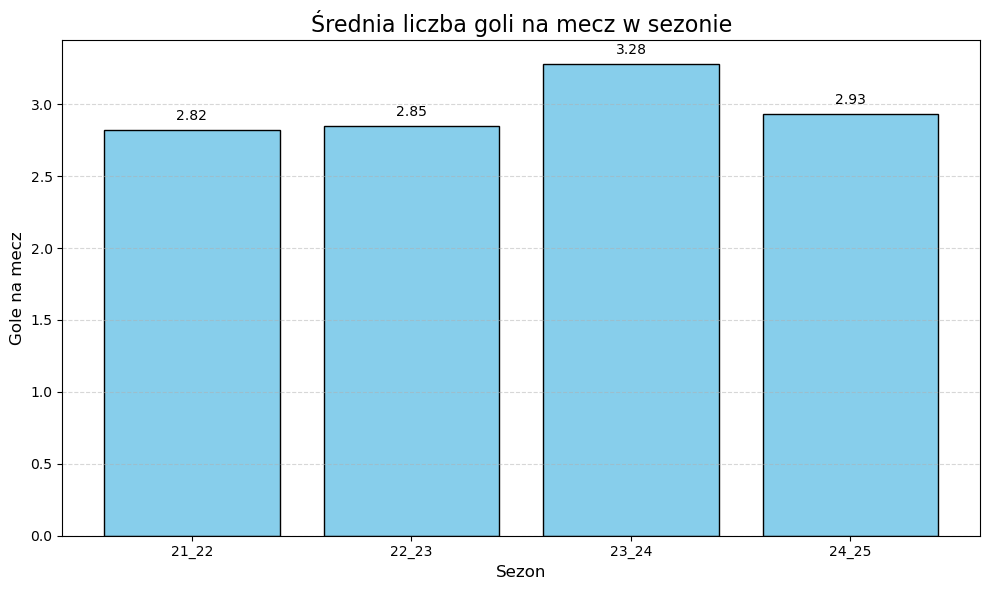



🧑‍⚖️ Analiza fauli i kartek (gospodarze vs goście):
                   Home   Away
Średnie faule    10.550  10.93
Żółte kartki      1.780   2.02
Czerwone kartki   0.059   0.06


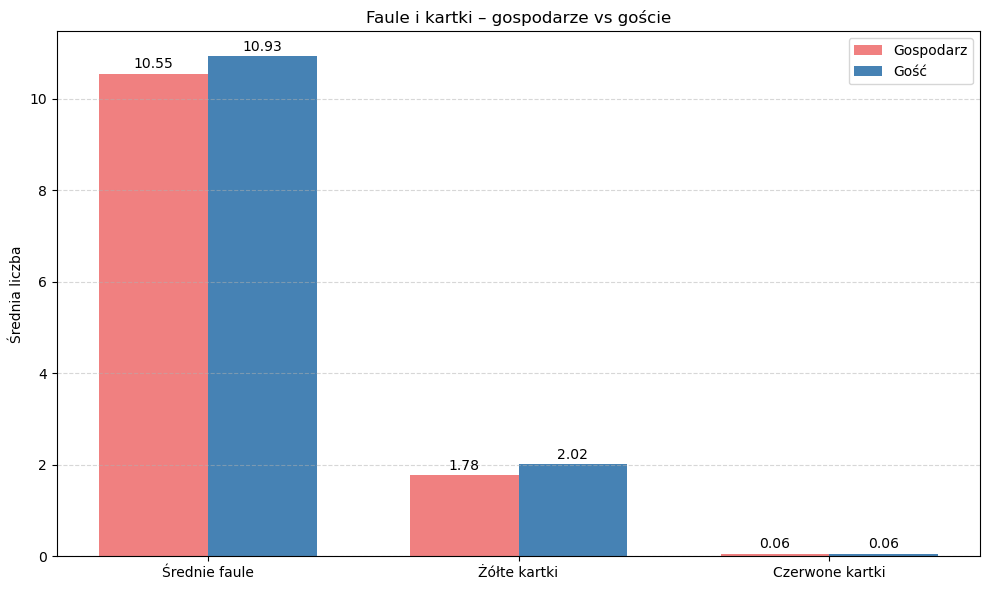



📊 Udział wygranych: Gospodarz vs Gość vs Remis
  Zwyciezca  Udział [%]
0      Home       44.54
1      Away       32.43
2      Draw       23.03


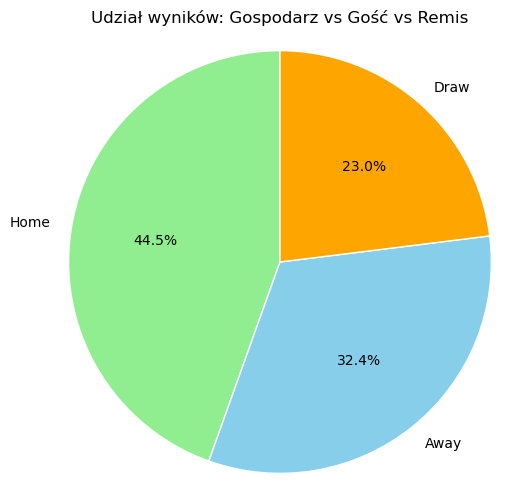



🎯 Średnia liczba strzałów na mecz:
               Rodzaj  Średnia
0  Strzały gospodarzy    14.24
1       Strzały gości    11.85


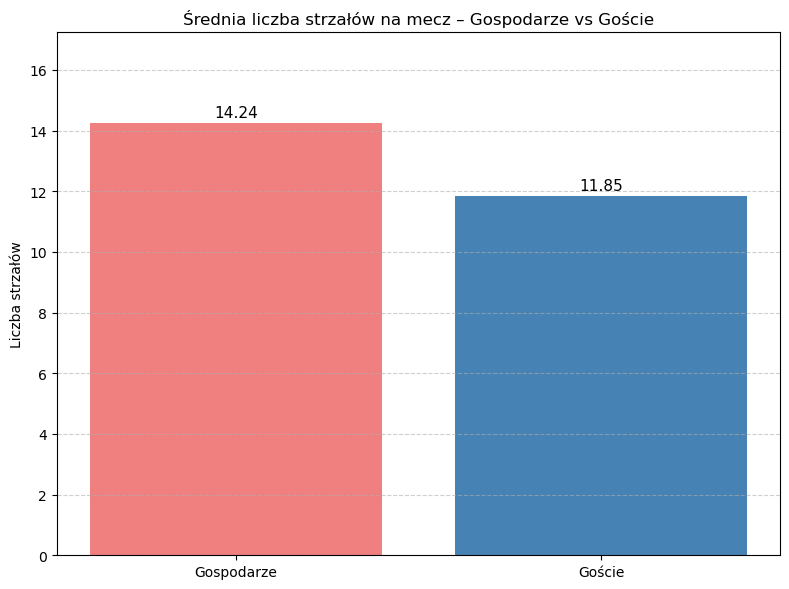



🥅 Skuteczność (celność) strzałów:
      Drużyna  Celność [%]
0  Gospodarze        35.40
1      Goście        36.05


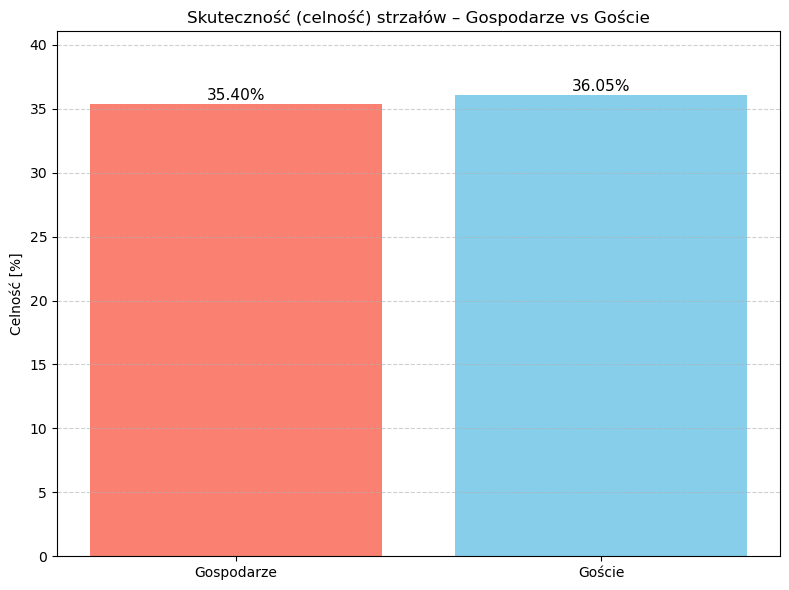



📊 Analiza strzałów i celności dla każdej drużyny (dom/wyjazd)
             Drużyna  Sr. strzały (dom)  Sr. celność (dom)  \
0            Arsenal              17.99              35.59   
1        Aston Villa              13.61              38.02   
2        Bournemouth              13.72              35.14   
3          Brentford              12.71              39.54   
4           Brighton              16.11              34.00   
5            Burnley              12.71              29.60   
6            Chelsea              16.28              36.34   
7     Crystal Palace              13.08              33.61   
8            Everton              12.70              36.18   
9             Fulham              13.28              36.41   
10           Ipswich              10.95              33.33   
11             Leeds              13.66              30.25   
12         Leicester              10.95              36.47   
13         Liverpool              20.05              35.38   
14    

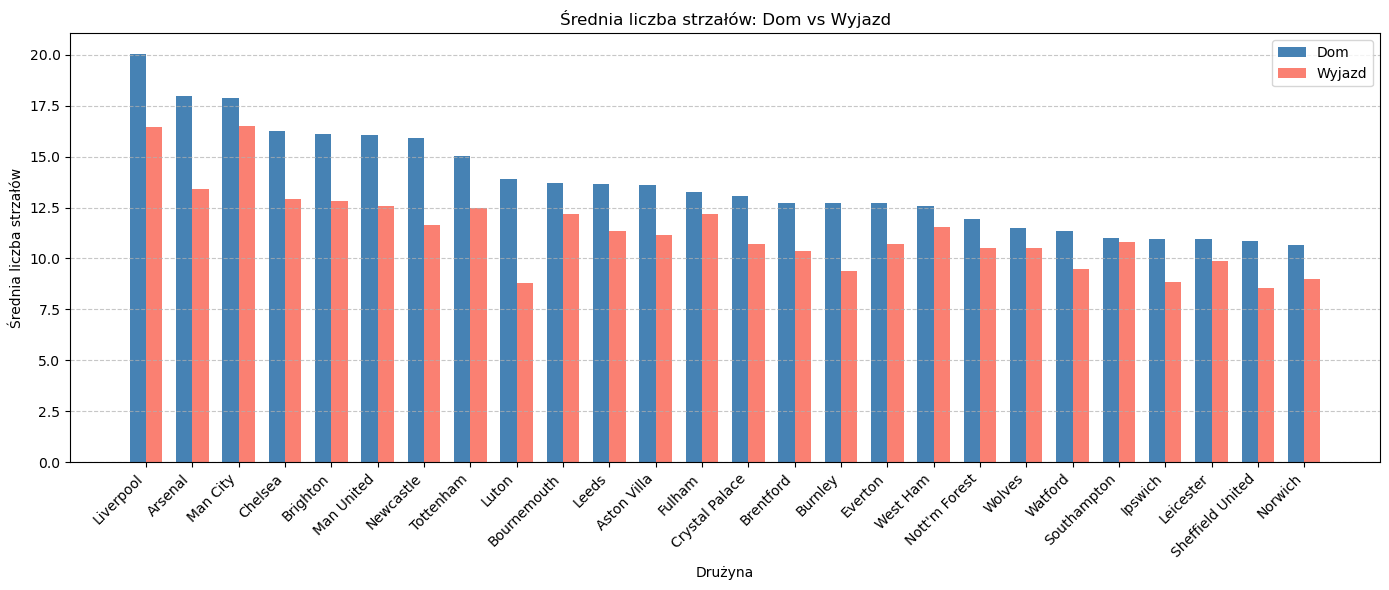

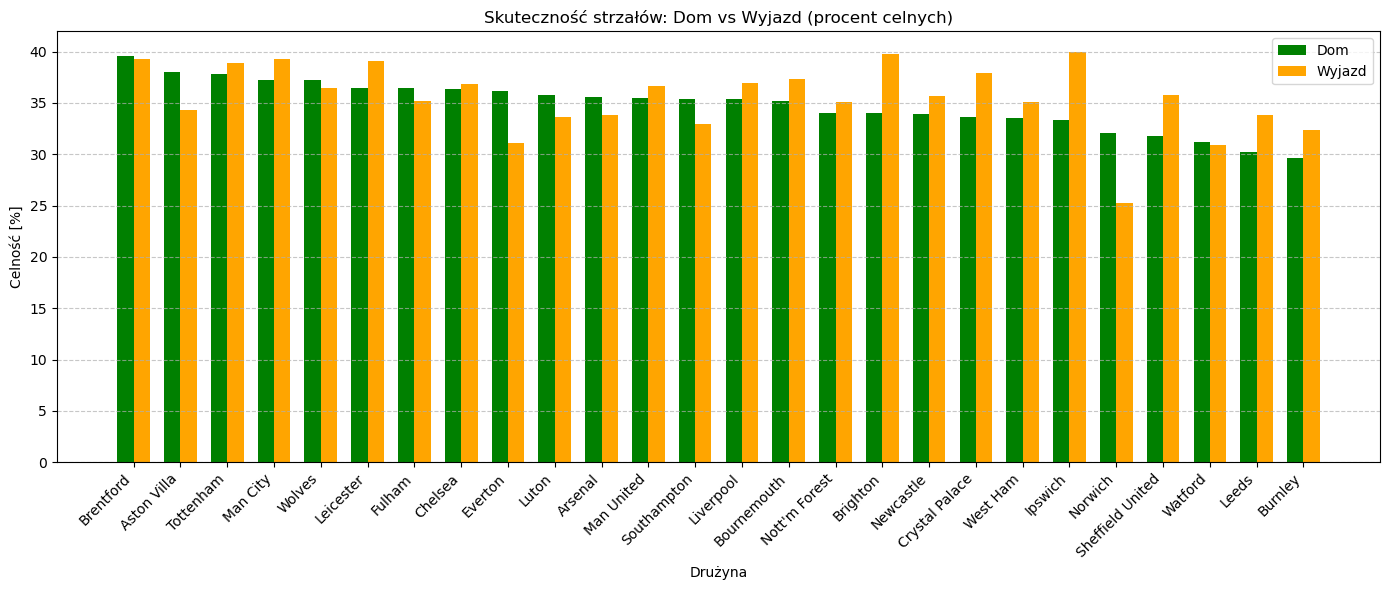

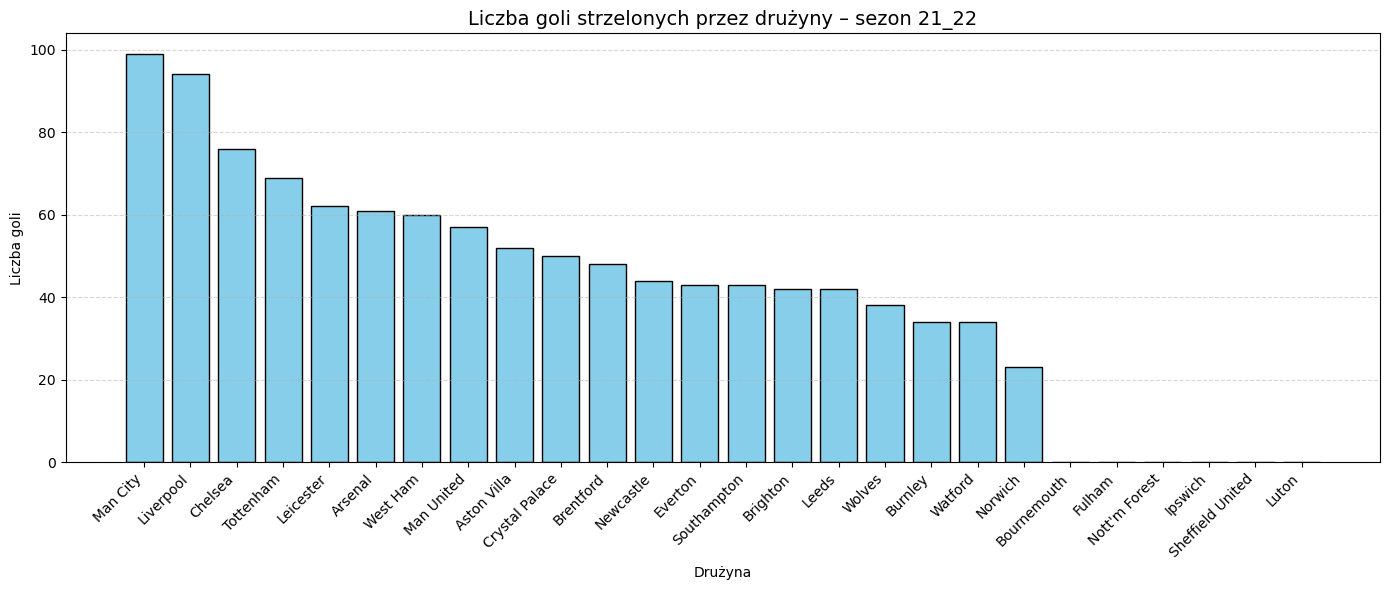

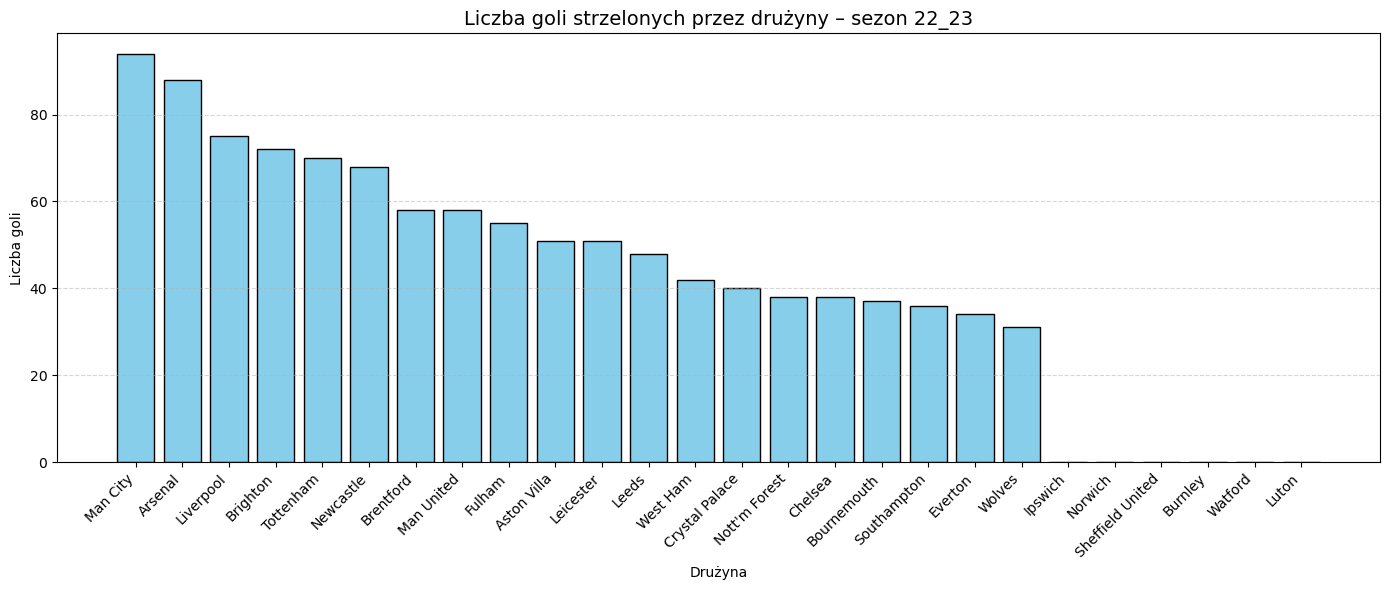

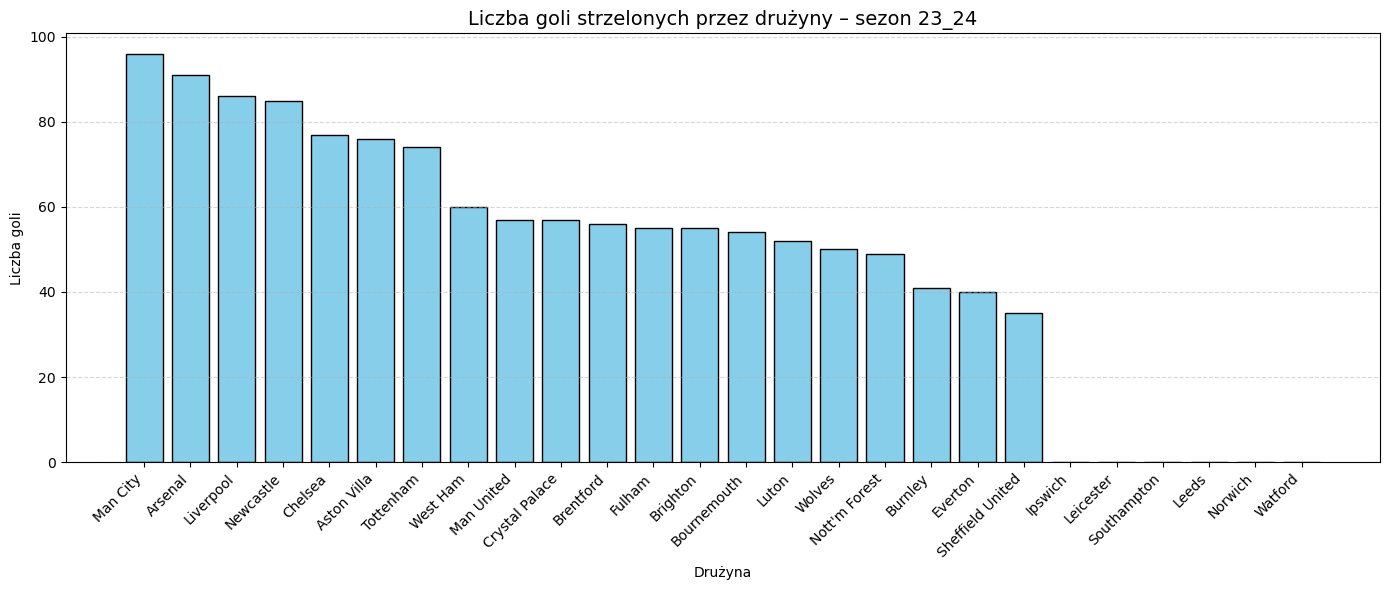

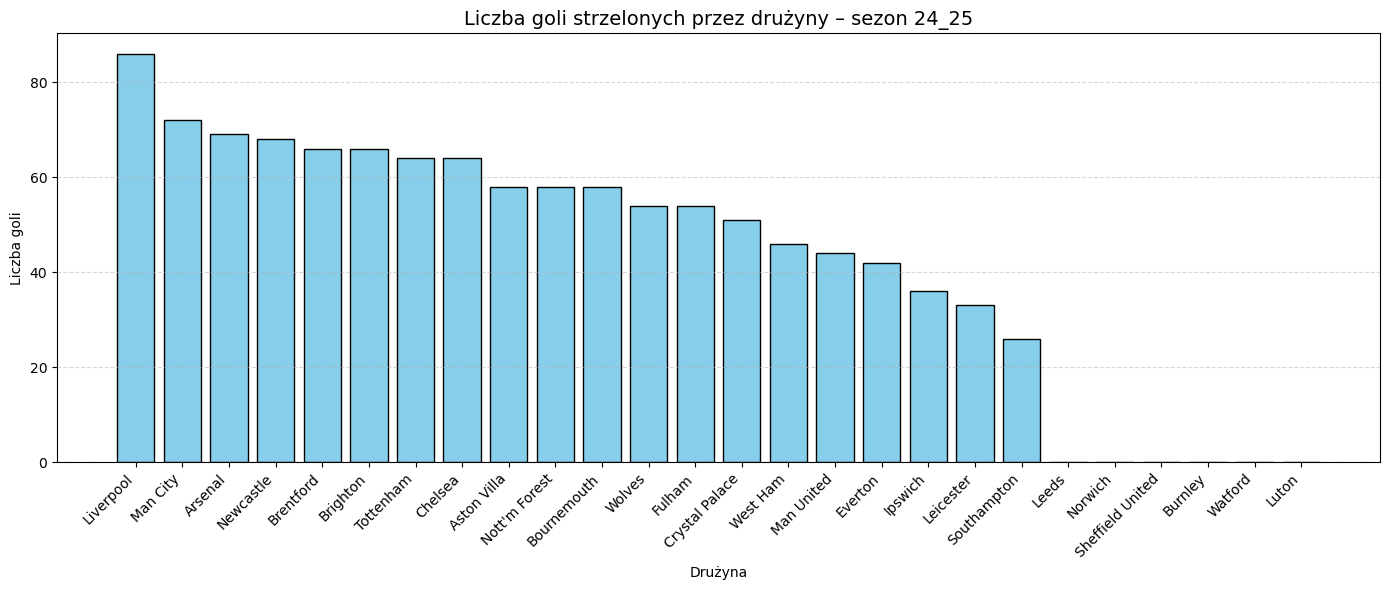

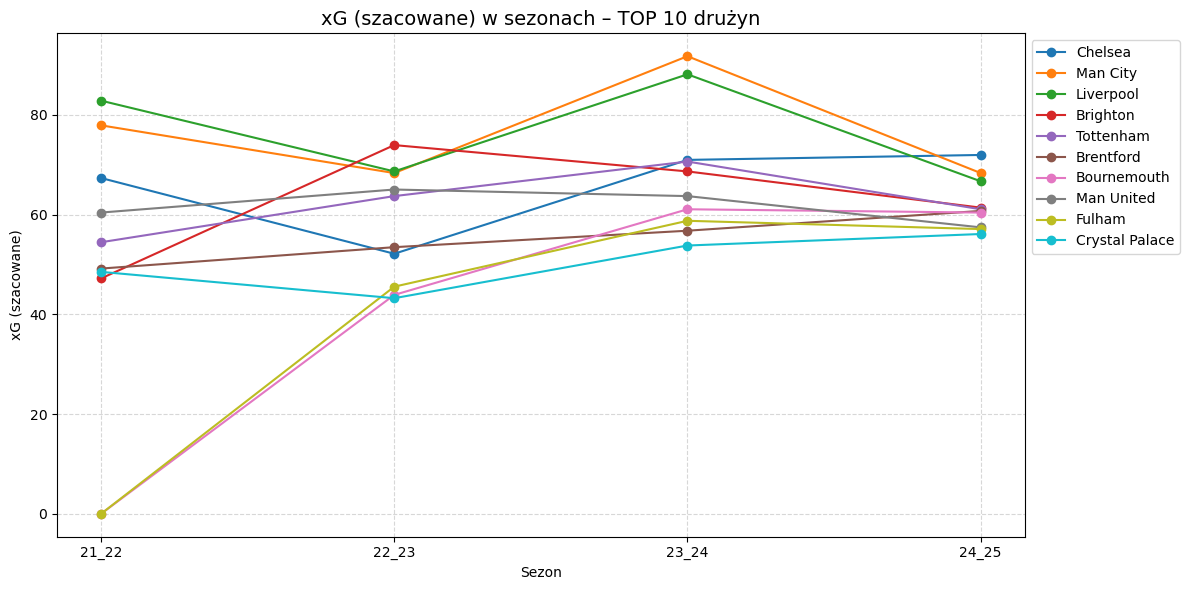

In [1]:
import os
import numpy as np
import pandas as pd
from analiza import AnalyzerMultiSeason
from statystyki import StatystykiSezonu
from wizualizacje import (
    wykres_srednia_goli,
    wykres_faule_kartki,
    wykres_udzial_wygranych,
    wykres_srednia_strzalow,
    wykres_celnosc,
    wykres_celnosc_druzyn,
    wykres_strzaly_druzyn,
    wykres_gole_druzyn_na_sezon,
    wykres_xg_top10
)

# 📂 Wczytaj dane z folderu
folder_path = "C:/Moje/Python proj"
pliki_csv = [plik for plik in os.listdir(folder_path) if plik.endswith(".csv")]

# 🔄 Wczytaj dane i dodaj kolumnę 'Zwyciezca'
analyzer = AnalyzerMultiSeason(folder_path, pliki_csv)
df_all = analyzer.wczytaj_wszystkie_dane()
analyzer.dodaj_kolumne_zwyciezca()

# 📊 Obiekt klasy z analizami
stat = StatystykiSezonu(df_all)

# === ANALIZY TEKSTOWE ===
print("➡️ Średnia liczba goli w sezonie:")
print(stat.srednia_goli_per_sezon(), "\n")
print("-" * 80)

print("➡️ Średnia liczba fauli i kartek:")
print(stat.analiza_faul_kartki(), "\n")
print("-" * 80)

print("➡️ Udział zwycięstw gospodarzy, remisów i gości:")
print(stat.udzial_wygranych_home_away(), "\n")
print("-" * 80)

print("➡️ Średnia liczba strzałów:")
print(stat.srednia_strzalow(), "\n")
print("-" * 80)

print("➡️ Skuteczność strzałów (gole/strzały):")
print(stat.skutecznosc_strzalow(), "\n")
print("-" * 80)

print("➡️ Strzały i skuteczność drużyn:")
print(stat.statystyki_strzalow_druzyn(), "\n")
print("-" * 80)

print("➡️ Liczba goli strzelonych przez drużyny w każdym sezonie:")
print(stat.gole_druzyn_na_sezon(), "\n")
print("-" * 80)

print("➡️ Uproszczony wskaźnik xG na sezon:")
print(stat.xg_per_season(), "\n")
print("-" * 80)

# === WIZUALIZACJE ===

# 1. Średnia goli na sezon
df_gole = stat.srednia_goli_per_sezon()
wykres_srednia_goli(df_gole)
print("\n" + "="*100 + "\n")

# 2. Faule i kartki
df_faul_kartki = stat.analiza_faul_kartki()
wykres_faule_kartki(df_faul_kartki)
print("\n" + "="*100 + "\n")

# 3. Udział zwycięstw
df_udzial = stat.udzial_wygranych_home_away()
wykres_udzial_wygranych(df_udzial)
print("\n" + "="*100 + "\n")

# 4. Średnia liczba strzałów
df_srednia_strzalow = stat.srednia_strzalow()
lista_strzalow = df_srednia_strzalow["Średnia"].astype(float).tolist()
wykres_srednia_strzalow(lista_strzalow)
print("\n" + "="*100 + "\n")

# 5. Skuteczność strzałów
seria_celnosc = stat.skutecznosc_strzalow()
if isinstance(seria_celnosc, pd.Series):
    lista_celnosc = seria_celnosc.astype(float).tolist()
elif isinstance(seria_celnosc, pd.DataFrame) and "Celność [%]" in seria_celnosc.columns:
    lista_celnosc = seria_celnosc["Celność [%]"].astype(float).tolist()
else:
    raise ValueError("Nieoczekiwany format danych dla skuteczności strzałów.")
wykres_celnosc(lista_celnosc)
print("\n" + "="*100 + "\n")

# 6. Strzały i celność drużyn
df_druzyny_strzaly = stat.statystyki_strzalow_druzyn()
wykres_strzaly_druzyn(df_druzyny_strzaly)
print("\n" + "="*100 + "\n")
wykres_celnosc_druzyn(df_druzyny_strzaly)
print("\n" + "="*100 + "\n")

# 7. Gole drużyn na sezon
df_gole_sezon = stat.gole_druzyn_na_sezon()
wykres_gole_druzyn_na_sezon(df_gole_sezon)
print("\n" + "="*100 + "\n")

# 8. xG
df_xg_szeroko = stat.xg_per_season()
wykres_xg_top10(df_xg_szeroko)
print("\n" + "="*100 + "\n")
